In [1]:
#@title
#!pip install labml_nn;
#!pip install datasets;
#!pip install torchmetrics;
#!pip install tqdm;
#!pip install git+https://github.com/fra31/auto-attack;
#!pip3 install torch==1.11.0+cu115 torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html;
#pip install wandb
import os;
os.environ['CUDA_LAUNCH_BLOCKING'] = "1";
import torch;
torch.backends.cudnn.enabled = False;

In [2]:
import torch
torch.round()

TypeError: round() received an invalid combination of arguments - got (), but expected one of:
 * (Tensor input, *, Tensor out)
 * (Tensor input, *, int decimals, Tensor out)


In [2]:
device = "cuda"
from utils import *
from UNet import *
import torch
import gc
#acc = load_accuracy()
#resnet, resnet_scaled = load_resnet()
x_train,y_train,x_test,y_test = load_data()
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)
#onet_unet = UNet
#from DDPMs import *
#onet_ddpm = DenoiseDiffusion(onet_unet,5000,device)

total progress:   0%|          | 0/3 [00:00<?, ?it/s]

epoch progress:   0%|          | 0/781 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


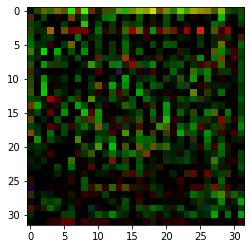

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


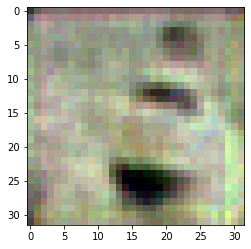

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


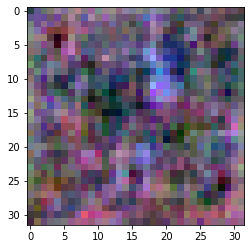

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


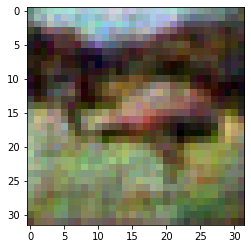

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


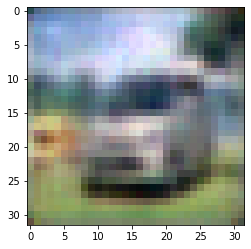

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


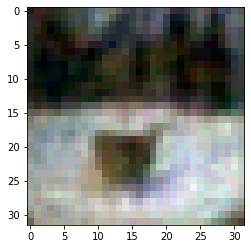

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


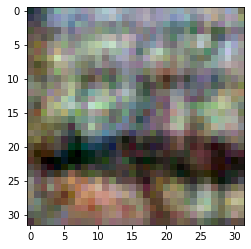

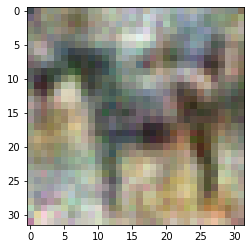

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


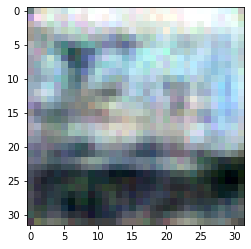

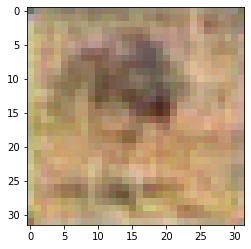

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


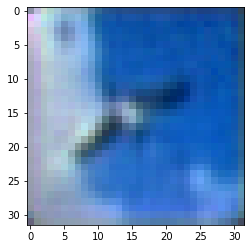

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


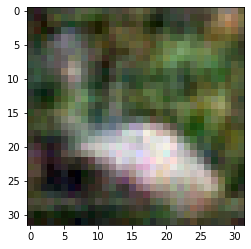

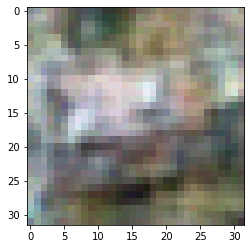

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


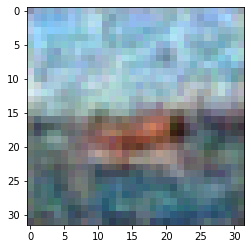

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


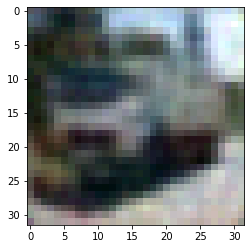

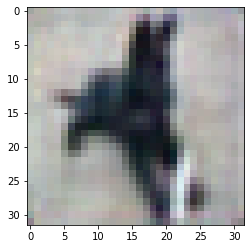

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


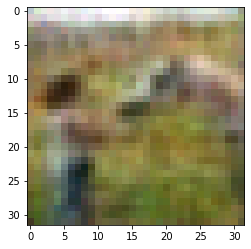

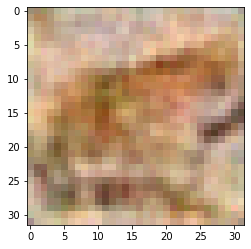

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


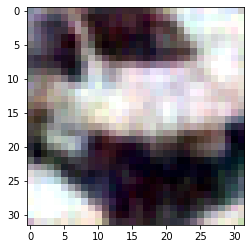

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


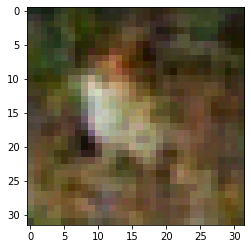

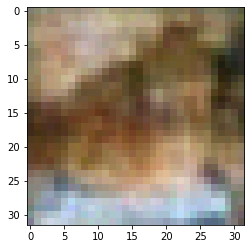

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


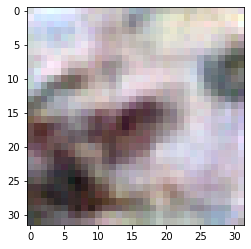

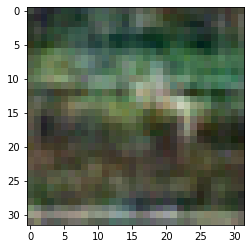

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


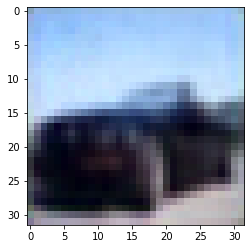

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


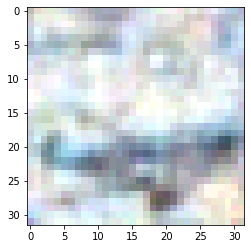

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


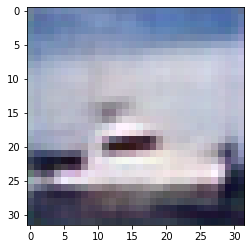

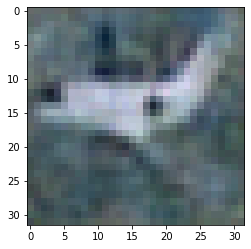

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


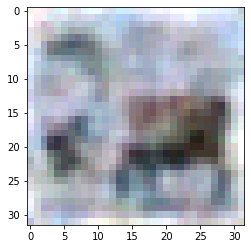

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


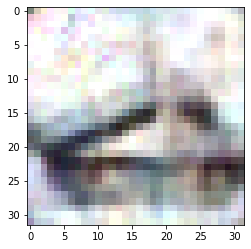

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


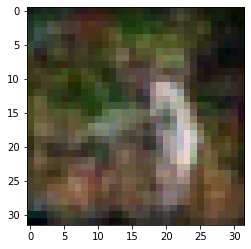

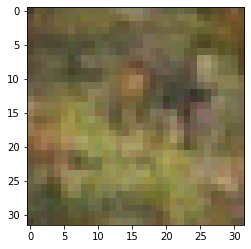

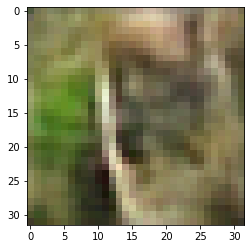

epoch progress:   0%|          | 0/781 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


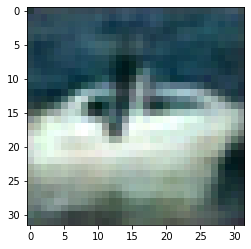

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


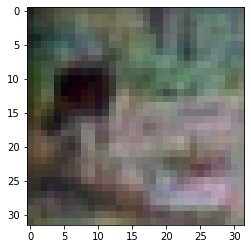

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


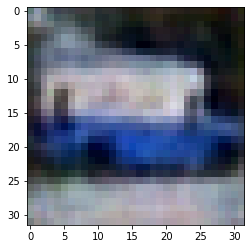

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


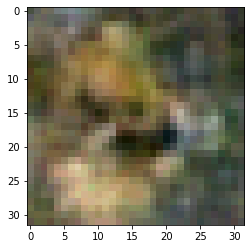

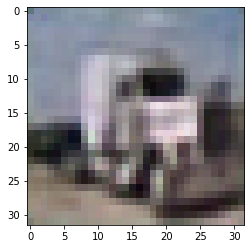

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


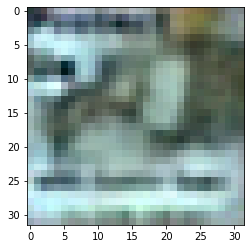

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


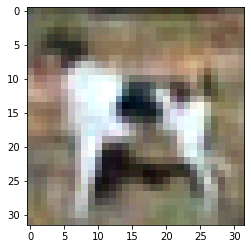

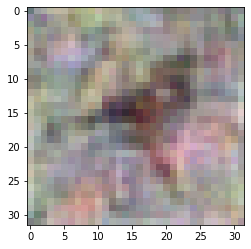

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


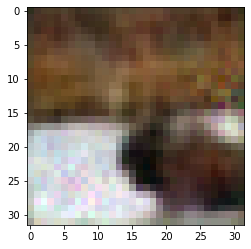

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


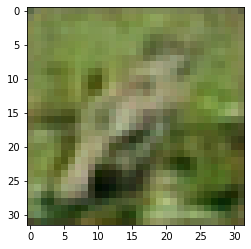

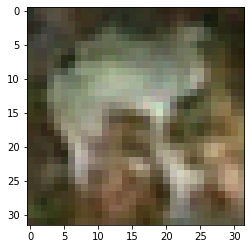

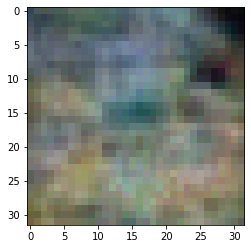

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


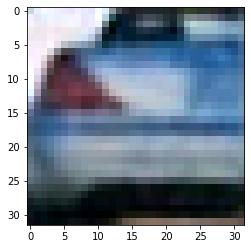

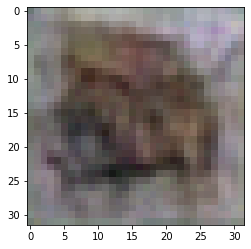

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


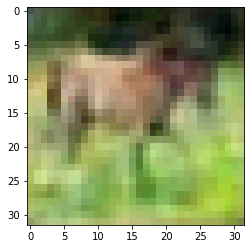

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


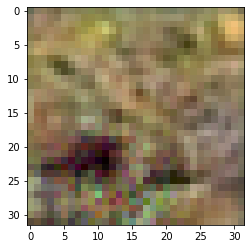

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


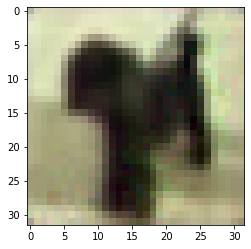

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


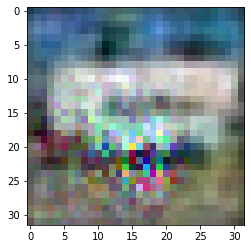

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


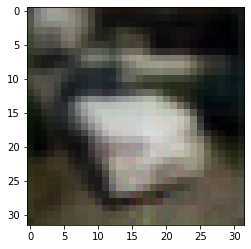

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


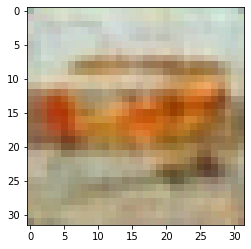

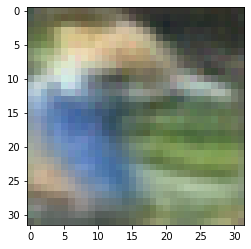

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


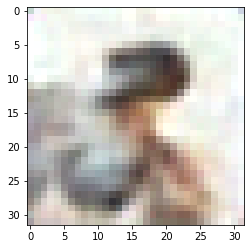

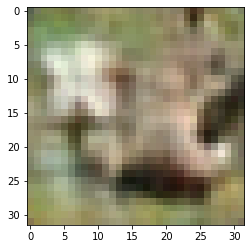

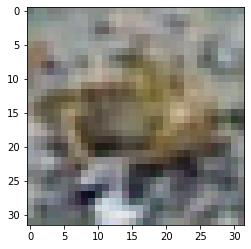

In [ ]:
from tqdm.notebook import tqdm
import wandb
import torch.nn.functional as F
from DDPMs import *

onet_unet = UNet().to(device)
onet_ddpm = DenoiseDiffusion(onet_unet,5000,device)
batch_size = 64 # Lower this if hitting memory issues
lr = 2e-4
n_epochs = 1

config = {
    "batch_size":64,
    "learning_rate":2e-4,
    "n_channels":64,
    "optimizer":"adamw",
}

wandb.init(config = config, project="One Step UNet", entity="zachs_team")
optim = torch.optim.AdamW(onet_unet.parameters(), lr=lr)
epoch_data = x_train

for j in tqdm(range(0,n_epochs),desc = 'total progress'):
    epoch_data = epoch_data[torch.randperm(epoch_data.size()[0])]
    idx = 0
    for i in tqdm(range(0, len(epoch_data)-batch_size, batch_size),desc = 'epoch progress',leave = False): #One run through the training set
        curr_batch = epoch_data[idx:idx+batch_size]
        #Get our randomized timestep to use during training
        t = torch.randint(0,150,(1,)).to(device)
        curr_noised_batch = onet_ddpm.q_sample(curr_batch,t)[0]
        cleaned_images = onet_unet(curr_noised_batch,t)
        if i%100 == 0: 
            show(cleaned_images[4].cpu().detach().numpy())
        loss = F.mse_loss(cleaned_images,curr_batch)
        wandb.log({"loss": loss})
        optim.zero_grad()
        loss.backward() # Backpropagate the loss (computes and store gradients)
        optim.step()
        idx += batch_size


In [44]:
torch.save(onet_unet,'/home/ubuntu/PSU_research/Notebooks/state_dicts/oneshot_unet.pt')

Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 152, in check_network_status
    status_response = self._interface.communicate_network_status()
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb/sdk/interface/interface.py", line 138, in communicate_network_status
    resp = self._communicate_network_status(status)
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb/sdk/interface/interface_shared.py", line 405, in _communicate_network_status
    resp = self._communicate(req, local=True)
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9

In [3]:
#Train the CertifiedRobustness Denoiser

class CertifiedRobustnessModel():
    def __init__(self,classifier,denoise_model,t,num_classes = 10,batch_size = 2,grad = True):
        self.classifier = classifier
        self.denoise_model = denoise_model
        self.t = torch.tensor([t]).to(device).long()
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.grad = grad
        self.acc = Accuracy(num_classes = self.num_classes).to(device)
        self.beta = torch.linspace(0.0001, 0.02, 5000).to(device) #Noise scheduling, the beta t's 
        self.alpha = 1. - self.beta #Reparametarization trick to get at any timestep
        self.alpha_bar = torch.cumprod(self.alpha, dim=0)
    def forward_sample(self,x,t = None):
        t = check_t(self,t)
        sigma2 = (1 - self.alpha_bar[t])/self.alpha_bar[t]
        delta = torch.randn(x.shape).to(device) * sigma2
        return self.alpha_bar[t]**0.5 * x + delta

loss,█▄▃▃▂▂▁▂▂▁▁▂▁▁▁▂▁
loss,0.03831


total progress:   0%|          | 0/2 [00:00<?, ?it/s]

epoch progress:   0%|          | 0/1562 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


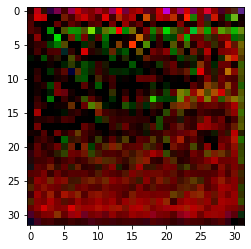

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


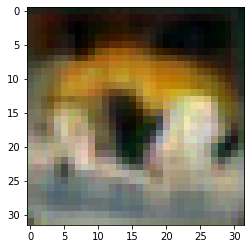

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


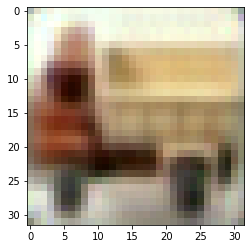

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


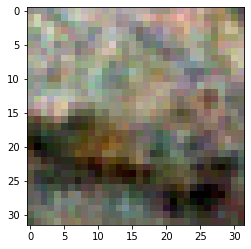

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


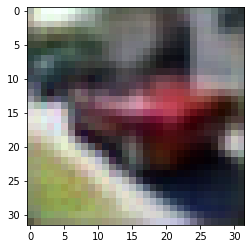

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


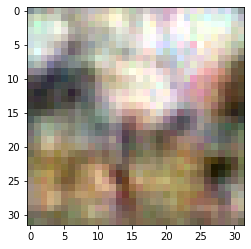

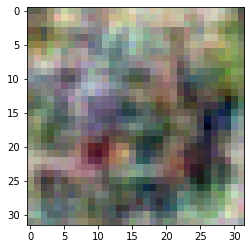

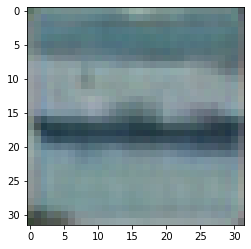

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


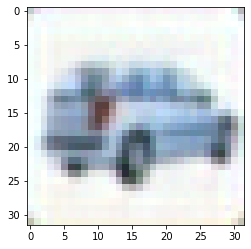

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


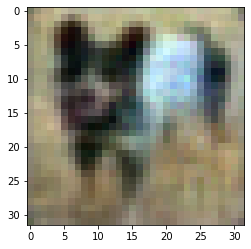

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


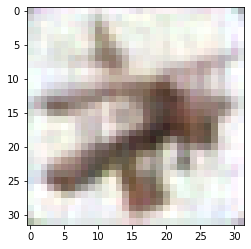

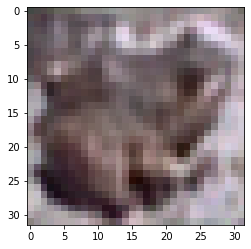

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


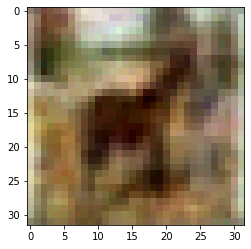

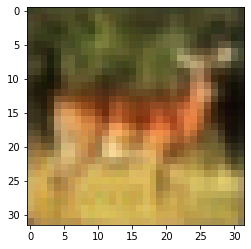

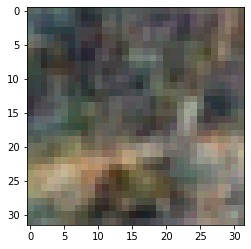

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


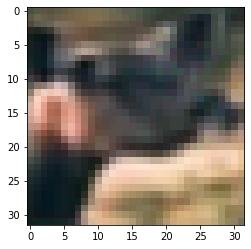

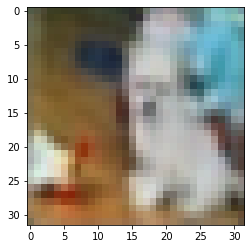

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


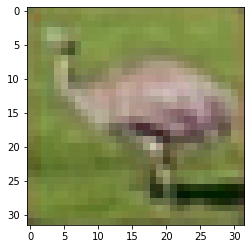

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


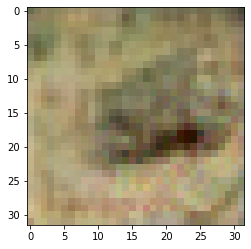

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


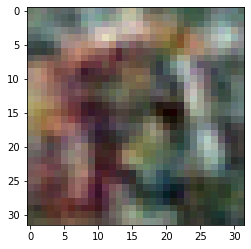

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


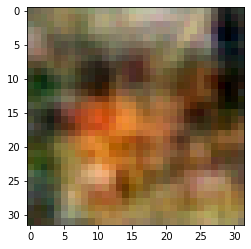

epoch progress:   0%|          | 0/1562 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


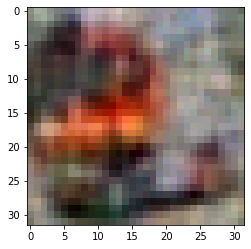

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


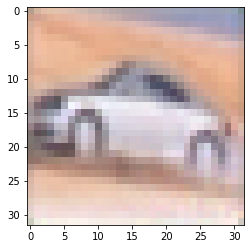

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


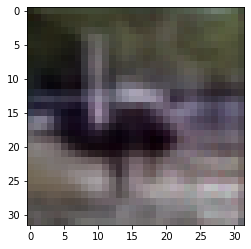

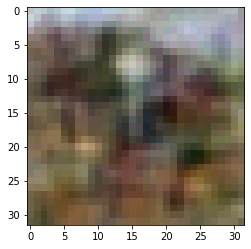

KeyboardInterrupt: 

In [5]:
from tqdm.notebook import tqdm
import wandb
import torch.nn.functional as F

from torchmetrics import Accuracy
from tqdm.notebook import tnrange
def check_t(self,t):
    if t is None:
        t = self.t
    else: 
        t = torch.tensor([t]).to(device)
    return t

certified_denoiser = UNet().to(device)
batch_size = 32 # Lower this if hitting memory issues
lr = 2e-4
n_epochs = 2
model = CertifiedRobustnessModel(None,certified_denoiser,100)
config = {
    "batch_size":32,
    "learning_rate":2e-4,
    "n_channels":64,
    "optimizer":"adamw",
}

wandb.init(config = config, project="CertifiedRobustness", entity="zachs_team")
optim = torch.optim.AdamW(certified_denoiser.parameters(), lr=lr)
epoch_data = x_train

for j in tqdm(range(0,n_epochs),desc = 'total progress'):
    epoch_data = epoch_data[torch.randperm(epoch_data.size()[0])]
    idx = 0
    for i in tqdm(range(0, len(epoch_data)-batch_size, batch_size),desc = 'epoch progress',leave = False): #One run through the training set
        curr_batch = epoch_data[idx:idx+batch_size]
        #Get our randomized timestep to use during training
        t = torch.randint(0,400,(1,)).to(device)
        curr_noised_batch = model.forward_sample(curr_batch,t)
        cleaned_images = model.denoise_model(curr_noised_batch,t)
        if i%300 == 0: 
            show(cleaned_images[4].cpu().detach().numpy())
        loss = F.mse_loss(cleaned_images,curr_batch)
        wandb.log({"loss": loss})
        optim.zero_grad()
        loss.backward() # Backpropagate the loss (computes and store gradients)
        optim.step()
        idx += batch_size


In [7]:
torch.save(certified_denoiser,"certified_denoiser")

Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb/sdk/wandb_run.py", line 170, in check_status
    status_response = self._interface.communicate_stop_status()
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb/sdk/interface/interface.py", line 127, in communicate_stop_status
    resp = self._communicate_stop_status(status)
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb/sdk/interface/interface_shared.py", line 395, in _communicate_stop_status
    resp = self._communicate(req, local=True)
  File "/home/ubuntu/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/wandb